## 0.1) Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 0.2) Importing All Associated DataFrames

In [2]:
# Importing main dataframes
df_train = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\train_data\\train_task_1_2.csv').sample(n=100000, random_state=1)
df_test_private = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\test_data\\Task 1 And 2\\test_private_answers_task_1.csv').sample(n=100000, random_state=1)
df_test_public = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\test_data\\Task 1 And 2\\test_public_answers_task_1.csv').sample(n=100000, random_state=1)

# Importing metadata datasets
df_answer_metadata = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\metadata\\answer_metadata_task_1_2.csv', parse_dates=['DateAnswered'])
df_question_metadata = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\metadata\\question_metadata_task_1_2.csv')
df_student_metadata = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\metadata\\student_metadata_task_1_2.csv', parse_dates=['DateOfBirth'])
df_subject_metadata = pd.read_csv('C:\\Users\\akshay gera\\ML Theory and Practise Lab\\Project-1\\Project\\data\\metadata\\subject_metadata.csv')

In [3]:
# Creating a list of dataframes loaded in memory for further use

dataframes_list=[]    
for var in dir():
    if isinstance(locals()[var], pd.core.frame.DataFrame)  and var[0]!='_':
        dataframes_list.append(var)
dataframes_list

['df_answer_metadata',
 'df_question_metadata',
 'df_student_metadata',
 'df_subject_metadata',
 'df_test_private',
 'df_test_public',
 'df_train']

In [4]:
# Creating a dictionary of dataframes names

dataframe_dict = {'df_answer_metadata': df_answer_metadata,
 'df_question_metadata': df_question_metadata,
 'df_student_metadata': df_student_metadata,
 'df_subject_metadata': df_subject_metadata,
 'df_test_private': df_test_private,
 'df_test_public': df_test_public,
 'df_train': df_train}

## 0.3) Sample View of DataFrames Imported

In [5]:
df_train

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
13479626,13280,23679,12071710,1,4,4
3006316,4580,97146,13047606,0,1,2
10827976,10908,63938,16771729,0,3,1
4324031,23835,25324,5315937,1,3,3
8351597,27587,112850,19032993,1,4,4
...,...,...,...,...,...,...
12062644,6889,6331,14937373,0,3,2
6137953,3989,30838,1170652,0,2,4
12302085,3274,91236,299175,1,4,4
8616533,24706,76590,9474177,0,2,3


In [6]:
# Taking a sample of 100000 records from the df_train_main dataframe and naming it as df_train
# Sampling is being done to make computation faster and more optimized

#df_train = df_train.sample(n=100000, random_state=1)

In [7]:
df_test_private

,QuestionId,UserId,AnswerId,IsCorrect
983692,25211,42666,15289058,1
1959549,2701,85508,2034652,1
291518,9773,66508,16805988,1
1389889,25332,64316,13663699,1
1829407,10125,89804,6269842,1
...,...,...,...,...
1587974,5896,100675,1744980,0
1907519,8540,33201,9134151,1
843494,836,9620,13982795,0
1903016,22693,90547,17819007,1


In [8]:
df_test_public

,QuestionId,UserId,AnswerId,IsCorrect
983690,23393,33163,7853861,1
217436,23863,4213,8317965,1
207675,16283,28162,8762558,1
404744,12928,100303,8328148,1
1829406,17789,41210,18806112,0
...,...,...,...,...
1564722,21410,5414,8200625,1
1942361,16522,81369,6807899,1
903819,14080,2764,15128220,0
639603,6677,14345,7414275,0


In [9]:
df_answer_metadata

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,11808339.0,2020-03-17 07:55:00,NaN,4186,14854,NaN
1,98649.0,2018-12-18 14:23:00,NaN,9427,16895,28237.0
2,259238.0,2019-02-21 12:41:00,NaN,7651,1127,8386.0
3,17027648.0,2020-03-01 18:13:00,NaN,8719,5126,40960.0
4,6579101.0,2019-03-22 14:57:00,NaN,9020,13445,NaN
...,...,...,...,...,...,...
19834815,6955999.0,2019-09-27 11:05:00,100.0,5092,9378,8375.0
19834816,950591.0,2020-04-29 08:39:00,NaN,4924,10639,NaN
19834817,5181829.0,2018-11-16 11:40:00,NaN,633,11950,8464.0
19834818,8813030.0,2020-03-07 20:20:00,NaN,7176,13776,NaN


In [10]:
df_question_metadata

,QuestionId,SubjectId
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"
...,...,...
27608,8083,"[3, 32, 144, 208]"
27609,24671,"[3, 32, 144, 208]"
27610,18085,"[3, 32, 144, 208]"
27611,25102,"[3, 32, 38, 239]"


In [11]:
df_student_metadata

,UserId,Gender,DateOfBirth,PremiumPupil
0,58022,2,2006-08-01 00:00:00.000,1.0
1,104674,0,NaN,NaN
2,32020,2,2008-11-01 00:00:00.000,1.0
3,81780,2,2004-07-01 00:00:00.000,NaN
4,99967,0,NaN,NaN
...,...,...,...,...
118966,107741,1,2003-05-01 00:00:00.000,0.0
118967,44720,2,2010-11-01 00:00:00.000,0.0
118968,100963,2,2007-10-01 00:00:00.000,0.0
118969,17170,0,NaN,NaN


In [12]:
df_subject_metadata

,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2
...,...,...,...,...
383,1982,Mixed operation Fractions,39.0,3
384,1983,Drawing Axes,54.0,3
385,1985,Reading Scales,98.0,3
386,1987,Sorting Shapes,174.0,3


## Observation of df_subject_metadata Data Structure

The dataframe contains data on topics and sub-topics of math subject along with their Ids.
To understand in context of data we will illustrate a hierarchy of records in three steps:

Step 1: 
Math is subject with SubjectId = 3

Step 2: 
Under Math there are 8 topics such as following:

(SubjectId Topic) >> 
    32	 Number
    49	 Algebra
    71	 Geometry and Measure
    101	 Data and Statistics
    119	 Advanced Pure
    149	 Advanced Mechanics
    151	 Advanced Statistics
    1156 Maths-Others

Step 3: For each topic there are further sub-topics. For example under Number (subjectid 32) there are 32 topics as follows:

(SubjectId Sub-Topic) >>
    35	Calculator Use
    36	Decimals
    37	Factors, Multiples and Primes
    38	Fractions, Decimals and Percentage Equivalence
    39	Fractions
    40	Indices, Powers and Roots
    42	Negative Numbers
    44	Percentages
    45	Proportion
    46	Ratio
    48	Surds
    141	Rounding and Estimating
    144	Basic Arithmetic
    331	Money
    1157	Number-Others
    1980	Types of number
  

In [13]:
# Sample view of major topics under Main Parent ID 3 which is Maths
# Hence under Math(TopicID=3) these are the following topics
# This is what we are interested in having in our dataframe

df_subject_metadata[df_subject_metadata.ParentId == 3]

,SubjectId,Name,ParentId,Level
1,32,Number,3.0,1
17,49,Algebra,3.0,1
39,71,Geometry and Measure,3.0,1
68,101,Data and Statistics,3.0,1
86,119,Advanced Pure,3.0,1
100,149,Advanced Mechanics,3.0,1
101,151,Advanced Statistics,3.0,1
313,1156,Maths-Others,3.0,1


In [14]:
# Creating a list of topics and their corresponding Topic Ids

Topics_List = list(df_subject_metadata[df_subject_metadata.ParentId == 3].Name)
Topics_Id_List = list(df_subject_metadata[df_subject_metadata.ParentId == 3].SubjectId)

print(Topics_List)
print(Topics_Id_List)

['Number', 'Algebra', 'Geometry and Measure', 'Data and Statistics', 'Advanced Pure', 'Advanced Mechanics', 'Advanced Statistics', 'Maths-Others']
[32, 49, 71, 101, 119, 149, 151, 1156]


In [15]:
# Creating a dictionary of Topic ID and Topic Name which will be used to seek Topic Name from Topic ID

Topic_Name_ID_Dict = dict(zip(Topics_Id_List, Topics_List))
Topic_Name_ID_Dict

{32: 'Number',
 49: 'Algebra',
 71: 'Geometry and Measure',
 101: 'Data and Statistics',
 119: 'Advanced Pure',
 149: 'Advanced Mechanics',
 151: 'Advanced Statistics',
 1156: 'Maths-Others'}

## 0.4) Objects Creation: Creating Functions and Classes Which will be Called Below

In [16]:
# Creating a function to return missing values in a dataframe

def Percent_Missing(dataframe):
    missing_count = dataframe.isnull().sum()
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'missing_count': missing_count,
                                     'percent_missing': percent_missing})
    print(missing_value_df)

In [17]:
# Function to change datatype of the column as desired

def Change_Data_Type(desired_type, dataframe, columns_list=[]):
    for column in columns_list:
        dataframe[column]= dataframe[column].astype(desired_type)

In [18]:
# Creating a class which compiles functions for Exploratory Data Analysis Steps which are repeated everytime

class EDA():
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    # Function to check number of missing values in a dataframe

    def Percent_Missing(self):
        missing_count = self.dataframe.isnull().sum()
        percent_missing = self.dataframe.isnull().sum() * 100 / len(self.dataframe)
        missing_value_df = pd.DataFrame({'column_name': self.dataframe.columns,
                                         'missing_count': missing_count,
                                         'percent_missing': percent_missing})
        print(missing_value_df)
    
    
    
    # Function to give box plots and kde plots of int and float data (numeric data) and countplot of categorical data
    def VisualizeDistributions(self):
        for column in list(self.dataframe.columns):
            try:
                # If the data type of the variable is object, the loop will print the result

                if self.dataframe[column].dtype != 'O':
                    plt.title(f'Box Plot of {column} Variable')
                    sns.boxplot(x=f'{column}', data=self.dataframe)
                    plt.show()
                    plt.title(f'KDE Plot of {column} Variable')
                    sns.kdeplot(x=f'{column}', data=self.dataframe)
                    plt.show()

                # IF the data type is categorical, the function will create countplot showing frequency disribution
                else:
                    plt.title(f'Count Plot of {column} Variable')
                    sns.countplot(x=f'{column}', data=self.dataframe)
                    plt.show()
            except:
                print(f'**Value error at variable {column}**')
                
    # Function to remove outliers and mark the outlier values as null values which can be dropped later on
    def RemoveOutliers(self, dataframe):
            for x in dataframe.columns:
                if dataframe[x].dtype != 'O':
                    q75,q25 = np.percentile(dataframe.loc[:,x],[75,25])
                    intr_qr = q75-q25

                    max = q75+(1.5*intr_qr)
                    min = q25-(1.5*intr_qr)

                    dataframe.loc[dataframe[x] < min,x] = np.nan
                    dataframe.loc[dataframe[x] > max,x] = np.nan
            return dataframe
    
    # Function which will get us number of unique values in categorical variables
    def Cardinality(self): 
            for column in list(self.dataframe.columns):
                try:
                    # If the data type of the variable is object, the loop will print the result
                    if self.dataframe[column].dtype == 'O':
                        print(f'Cardinality of {column} variable >> {self.dataframe[column].nunique()}')
                
                except:
                    print(f'**Value error at variable {column}**')
    
    # Function for Standard Scaling using Min Max Scaler
    def StandardScaler(self, df, target_variable):
    # Using min max scaler package of sklearn library to feature scale our data

        from sklearn.preprocessing import MinMaxScaler

        scaler = MinMaxScaler()
        features = df.drop(columns=target_variable)
        scaler.fit(features)
        feature_scaled_variables_array = scaler.transform(features)
        return feature_scaled_variables_array
    

In [19]:
# Creating a function to reduce the cardinality of the variables by defining thresholds
# Through this function we try to capture as many values of varibles as they can fit in our proportion thresholds
# The left out values are marked under one single value as 'All Others'
# This is done to reduce the cardinality of the features and make ML excercise more efficient and understandable


from collections import Counter

def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'All Others')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

# Code Credits: https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

In [20]:
# Creating a function to compute metrics for the model

def MLMetrics(model_name):
    
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
    accuracy = accuracy_score(target_test, model_name.predict(features_test), normalize=True)
    precision = precision_score(target_test, model_name.predict(features_test))
    recall = recall_score(target_test, model_name.predict(features_test))
    f1_score = f1_score(target_test, model_name.predict(features_test))

    print('_____________________________________________')
    print(f"accuracy: {accuracy}, \n precision: {precision} , \n recall: {recall} \n f1_score: {f1_score}, \n ")

    #Plotting the confusion matrix

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    cm = confusion_matrix(target_test, model_name.predict(features_test), labels=model_name.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model_name.classes_)
    return disp.plot()

# 1) Data Cleaning and Data Exploration

## 1.1) Checking Data Completeness

In [21]:
# Creating a for loop to check missing values of all dataframes

for dataframe in dataframes_list:
    print(f'Missing Values of ** {dataframe} ** DataFrame')
    # Given value from the dict created above
    Percent_Missing(dataframe=dataframe_dict[dataframe])
    print('___________________________________________')

Missing Values of ** df_answer_metadata ** DataFrame
                   column_name  missing_count  percent_missing
AnswerId              AnswerId              7         0.000035
DateAnswered      DateAnswered              0         0.000000
Confidence          Confidence       17952128        90.508147
GroupId                GroupId              0         0.000000
QuizId                  QuizId              0         0.000000
SchemeOfWorkId  SchemeOfWorkId       10107940        50.960583
___________________________________________
Missing Values of ** df_question_metadata ** DataFrame
           column_name  missing_count  percent_missing
QuestionId  QuestionId              0              0.0
SubjectId    SubjectId              0              0.0
___________________________________________
Missing Values of ** df_student_metadata ** DataFrame
               column_name  missing_count  percent_missing
UserId              UserId              0         0.000000
Gender              Gender

### Observation

We observe some complete and incomplete dataframes in our analysis.

-Complete dataframes without any missing values:
1) Training data >> df_train

2) Public Testing Data >> df_test_public

3) Private Testing Data >> df_test_private

4) Questions Metadata >> df_question_metadata


-Dataframes with missing values:
1) Answer Metadata >> df_answer_metadata

Variable 'Confidence' is 90% missing and 'SchemeofWorkId' is 50% missing values

2) Student Metadata >> df_student_metadata

Variable 'PremiumPupil' is 71% missing and 'DateofBirth' is 32% missing values

3) Subject Metadata >> df_subject_metadata

Variable 'ParentId' has 51% missing values


## 1.2) Data Cleaning and Feature Extraction

### 1.2.1) Question Metadata Dataframe: Making datatype change to SubjectID Column

In [22]:
# Converting string data type lists in SubjectID column to list datatype

import json

# Creating a new column with null values and object datatype
df_question_metadata['SubjectID'] = np.nan
df_question_metadata['SubjectID'] = df_question_metadata['SubjectID'].astype('object')

# running for loop to parse every value in the column and convert into list datatype
for i in df_question_metadata.index:
    df_question_metadata['SubjectID'][i] = json.loads(df_question_metadata.SubjectId[i])

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_1504/445305356.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question_metadata['SubjectID'][i] = json.loads(df_question_metadata.SubjectId[i])


In [23]:
# Dropping original variable SubjectId as we don't need it anymore

df_question_metadata = df_question_metadata.drop(columns='SubjectId')

In [24]:
# Checking the change in the frame

df_question_metadata

,QuestionId,SubjectID
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"
...,...,...
27608,8083,"[3, 32, 144, 208]"
27609,24671,"[3, 32, 144, 208]"
27610,18085,"[3, 32, 144, 208]"
27611,25102,"[3, 32, 38, 239]"


In [74]:
# Making sure no other subject other than Maths (which is code 3) is in our Question Id dataset

# Main subject is always the first element in the Subject ID list
# hence we are checking if there is anything other than 3

for i in df_question_metadata.index:
    if df_question_metadata.SubjectID[i][0] != 3:
        print('Subject Other than Math')

### Observation 

All our question Ids in the dataframe are from Math subject only.

In [25]:
# To make this SubjectID column more useful we are going to pick only major topics out of it 
# Our major topics are as follows:

Topic_Name_ID_Dict

{32: 'Number',
 49: 'Algebra',
 71: 'Geometry and Measure',
 101: 'Data and Statistics',
 119: 'Advanced Pure',
 149: 'Advanced Mechanics',
 151: 'Advanced Statistics',
 1156: 'Maths-Others'}

In [26]:
# Creating a mechanism to extract only major topics from the each row with list of SubjectIDs 
# This way we could have another column which will contain only Major Math Topics of each question

# Initializing with an empty list and another column 'TopicId' with values initialized as 'NULL'
topic_match_list = []
df_question_metadata['Major_Topics_Id'] = 'NULL'

# Running a for loop for each row index of the dataframe
for i in df_question_metadata.index:
    
    # Creating a for loop to for each element in the SubjectID list value in each row
    for sub_id in df_question_metadata.SubjectID[i]:
        
        # If subject id matches with topics id list, matched values will be appended to new list
        if sub_id in Topics_Id_List:
            
            topic_match_list.append(sub_id)
            
        # Matched values will be given to newly created column 'TopicId'    
        df_question_metadata['Major_Topics_Id'][i] = topic_match_list
        
    # Clearning the list after each row index loop
    topic_match_list = []

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_1504/3132601348.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question_metadata['Major_Topics_Id'][i] = topic_match_list


In [27]:
# Checking out the new column TopicID
# As we can see this column now contains only the major TopicId of each question 

df_question_metadata

,QuestionId,SubjectID,Major_Topics_Id
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]","[32, 71]"
1,1855,"[3, 71, 75, 86, 178]",[71]
2,10423,"[3, 32, 38, 239]",[32]
3,2290,"[3, 32, 33, 144]",[32]
4,12785,"[3, 32, 33, 144]",[32]
...,...,...,...
27608,8083,"[3, 32, 144, 208]",[32]
27609,24671,"[3, 32, 144, 208]",[32]
27610,18085,"[3, 32, 144, 208]",[32]
27611,25102,"[3, 32, 38, 239]",[32]


In [28]:
# Creating a new column with Names of Topics as a string value to make it more readable

# Initializing with an empty list
mylist = []
df_question_metadata['Major_Topics'] = 'NULL'

# For each row index, the loop will run
for i in df_question_metadata.index:
    # If the number of topics in the list is only 1, the column will be inserted with value straight
    if len(df_question_metadata['Major_Topics_Id'][i]) == 1:
        df_question_metadata['Major_Topics'][i] = Topic_Name_ID_Dict[df_question_metadata['Major_Topics_Id'][i][0]]
    
    # If there are multiple topic ids in the TopicId column
    else:
        # Creating a list of major topics extracted from each list of TopicID
        intersecting_topics_list = list(set(df_question_metadata['Major_Topics_Id'][i]).intersection(Topics_Id_List))
        
        # Running loop for each value in the TopicId list for the current row index i 
        for topic_id_index in range(len(intersecting_topics_list)):
            # The empty list will be appended with actual Name of topics
            # The names are called from the Dictionary object created above Topic_Name_ID_Dict
            # Through this we are able to seek Topic Name from Topic ID value
            mylist.append(Topic_Name_ID_Dict[df_question_metadata['Major_Topics_Id'][i][topic_id_index]])
        
        # The output is converted to string seperated with commas and entered in the new column 'TopicId_String'   
        df_question_metadata['Major_Topics'][i] = ' , '.join(str(x) for x in mylist)
        
        # Emptying the contents of the list for another loop
        mylist=[]

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_1504/1675565197.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question_metadata['Major_Topics'][i] = ' , '.join(str(x) for x in mylist)
C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_1504/1675565197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question_metadata['Major_Topics'][i] = Topic_Name_ID_Dict[df_question_metadata['Major_Topics_Id'][i][0]]


In [76]:
df_question_metadata

,QuestionId,SubjectID,Major_Topics_Id,Major_Topics,Major_Topics_Count,Sub_Topics_Name,Sub_Topics_Count
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]","[32, 71]","Number , Geometry and Measure",2,"[141, 214, 185, 186, 77]",5
1,1855,"[3, 71, 75, 86, 178]",[71],Geometry and Measure,1,"[75, 178, 86]",3
2,10423,"[3, 32, 38, 239]",[32],Number,1,"[38, 239]",2
3,2290,"[3, 32, 33, 144]",[32],Number,1,"[33, 144]",2
4,12785,"[3, 32, 33, 144]",[32],Number,1,"[33, 144]",2
...,...,...,...,...,...,...,...
27608,8083,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27609,24671,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27610,18085,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27611,25102,"[3, 32, 38, 239]",[32],Number,1,"[38, 239]",2


In [75]:
# Successfully we have tried to make another column which contains major math topics covered for each question id

df_question_metadata['Major_Topics'].value_counts()

Number                                                           11926
Geometry and Measure                                              6853
Algebra                                                           5464
Data and Statistics                                               2609
Advanced Pure                                                      280
Number , Algebra                                                   135
Algebra , Geometry and Measure                                     104
Number , Geometry and Measure                                       81
Maths-Others                                                        48
Number , Data and Statistics                                        28
Geometry and Measure , Maths-Others                                 24
Number , Maths-Others                                               18
Algebra , Advanced Pure                                             15
Data and Statistics , Maths-Others                                   6
Advanc

In [65]:
# Creating a new column which will contain number of major topics in each question

df_question_metadata['Major_Topics_Count'] = 0
df_question_metadata['Sub_Topics_Name'] = 'Null'
df_question_metadata['Sub_Topics_Count'] = 0

for i in df_question_metadata.index:
    # Creating a column which contains number of major topics in each question id
    df_question_metadata['Major_Topics_Count'][i] = len(df_question_metadata.Major_Topics_Id[i])
    
    # Creating a list which contains unique items in SubjectID column and MajorTopicsID
    # These unique items are our sub-topics of each question
    SubTopics_List = list(set(df_question_metadata.SubjectID[i]).symmetric_difference(df_question_metadata.Major_Topics_Id[i]))
    
    # Since the first element of this list will always be subject number =3, we will remove it and use rest
    SubTopics_List.remove(3)
    
    # The sub topics are then writtten to columns
    df_question_metadata['Sub_Topics_Name'][i] = SubTopics_List
    df_question_metadata['Sub_Topics_Count'][i] = len(SubTopics_List)
    

In [81]:
df_question_metadata

,QuestionId,SubjectID,Major_Topics_Id,Major_Topics,Major_Topics_Count,Sub_Topics_Name,Sub_Topics_Count
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]","[32, 71]","Number , Geometry and Measure",2,"[141, 214, 185, 186, 77]",5
1,1855,"[3, 71, 75, 86, 178]",[71],Geometry and Measure,1,"[75, 178, 86]",3
2,10423,"[3, 32, 38, 239]",[32],Number,1,"[38, 239]",2
3,2290,"[3, 32, 33, 144]",[32],Number,1,"[33, 144]",2
4,12785,"[3, 32, 33, 144]",[32],Number,1,"[33, 144]",2
...,...,...,...,...,...,...,...
27608,8083,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27609,24671,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27610,18085,"[3, 32, 144, 208]",[32],Number,1,"[144, 208]",2
27611,25102,"[3, 32, 38, 239]",[32],Number,1,"[38, 239]",2


### 1.2.2) Answer Metadata Dataframe: Feature Creation from Timestamp Variable

In [31]:
# Extracting features out of timestamp in 'DateAnswered' variable

df_answer_metadata['Answer_Hour'] = df_answer_metadata.DateAnswered.dt.hour
df_answer_metadata['Answer_Day'] = df_answer_metadata.DateAnswered.dt.day_name()
df_answer_metadata['Answer_Month'] = df_answer_metadata.DateAnswered.dt.month_name()
df_answer_metadata['Answer_Year'] = df_answer_metadata.DateAnswered.dt.year

### 1.2.3) Student Metadata Dataframe: Feature Creation from Timestamp Variable

In [32]:
# Changing data type from string to datetime format of DateofBirth variable

df_student_metadata['DateOfBirth']=pd.to_datetime(df_student_metadata['DateOfBirth'], format='%Y-%m-%d', errors = 'coerce')

In [33]:
# Extracting Student's Birthyear out of timestamp in 'DateofBirth' variable

df_student_metadata['Birth_Year'] = df_student_metadata.DateOfBirth.dt.year

# Replacing missing Birth Year values with 0 and converting datatype to integer
df_student_metadata['Birth_Year'] = df_student_metadata['Birth_Year'].fillna(0)
df_student_metadata['Birth_Year'] = df_student_metadata['Birth_Year'].astype('int')

In [34]:
df_student_metadata

,UserId,Gender,DateOfBirth,PremiumPupil,Birth_Year
0,58022,2,2006-08-01,1.0,2006
1,104674,0,NaT,NaN,0
2,32020,2,2008-11-01,1.0,2008
3,81780,2,2004-07-01,NaN,2004
4,99967,0,NaT,NaN,0
...,...,...,...,...,...
118966,107741,1,2003-05-01,0.0,2003
118967,44720,2,2010-11-01,0.0,2010
118968,100963,2,2007-10-01,0.0,2007
118969,17170,0,NaT,NaN,0


## 1.3) Joining Datasets

### 1.3.1) Train Data + Answer Metadata

In [78]:
# Merging df_answer_metadata with our main df_train dataframe

df_train_answer_merged = df_train.join(df_answer_metadata.set_index('AnswerId'), on='AnswerId', how='left')
df_train_answer_merged

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Answer_Hour,Answer_Day,Answer_Month,Answer_Year
13479626,13280,23679,12071710,1,4,4,2019-05-21 09:32:00,NaN,4456,3812,NaN,9,Tuesday,May,2019
3006316,4580,97146,13047606,0,1,2,2019-10-13 08:08:00,NaN,4543,16555,28237.0,8,Sunday,October,2019
10827976,10908,63938,16771729,0,3,1,2019-03-19 13:06:00,NaN,10878,12486,40958.0,13,Tuesday,March,2019
4324031,23835,25324,5315937,1,3,3,2019-02-02 12:42:00,NaN,7651,9609,8386.0,12,Saturday,February,2019
8351597,27587,112850,19032993,1,4,4,2018-12-06 11:05:00,NaN,10092,3024,8375.0,11,Thursday,December,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062644,6889,6331,14937373,0,3,2,2019-09-13 15:45:00,75.0,1228,10714,28237.0,15,Friday,September,2019
6137953,3989,30838,1170652,0,2,4,2020-03-23 11:42:00,NaN,7174,6985,8412.0,11,Monday,March,2020
12302085,3274,91236,299175,1,4,4,2018-09-26 22:34:00,NaN,4211,16625,NaN,22,Wednesday,September,2018
8616533,24706,76590,9474177,0,2,3,2019-04-09 19:57:00,NaN,10513,9654,NaN,19,Tuesday,April,2019


### 1.3.2) Train Data + Answer Metadata + Student Metadata

In [79]:
# Merging the student_metadata dataframe with the merged dataframe with df_train and df_answer_metadata

df_train_answer_student_merged = df_train_answer_merged.join(df_student_metadata.set_index('UserId'), on='UserId', how='left')
df_train_answer_student_merged

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Answer_Hour,Answer_Day,Answer_Month,Answer_Year,Gender,DateOfBirth,PremiumPupil,Birth_Year
13479626,13280,23679,12071710,1,4,4,2019-05-21 09:32:00,NaN,4456,3812,NaN,9,Tuesday,May,2019,0,NaT,NaN,0
3006316,4580,97146,13047606,0,1,2,2019-10-13 08:08:00,NaN,4543,16555,28237.0,8,Sunday,October,2019,2,2005-04-01,NaN,2005
10827976,10908,63938,16771729,0,3,1,2019-03-19 13:06:00,NaN,10878,12486,40958.0,13,Tuesday,March,2019,0,NaT,NaN,0
4324031,23835,25324,5315937,1,3,3,2019-02-02 12:42:00,NaN,7651,9609,8386.0,12,Saturday,February,2019,1,2007-04-01,0.0,2007
8351597,27587,112850,19032993,1,4,4,2018-12-06 11:05:00,NaN,10092,3024,8375.0,11,Thursday,December,2018,0,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062644,6889,6331,14937373,0,3,2,2019-09-13 15:45:00,75.0,1228,10714,28237.0,15,Friday,September,2019,2,2004-07-01,0.0,2004
6137953,3989,30838,1170652,0,2,4,2020-03-23 11:42:00,NaN,7174,6985,8412.0,11,Monday,March,2020,1,2005-03-01,0.0,2005
12302085,3274,91236,299175,1,4,4,2018-09-26 22:34:00,NaN,4211,16625,NaN,22,Wednesday,September,2018,1,2003-02-01,NaN,2003
8616533,24706,76590,9474177,0,2,3,2019-04-09 19:57:00,NaN,10513,9654,NaN,19,Tuesday,April,2019,0,NaT,NaN,0


### 1.3.3) Train Data + Answer Metadata + Student Metadata + Question Metadata

In [243]:
# Merging the question_metadata dataframe with the merged dataframe with df_train_answer_student
# From df_question metadata dataframe we are picking only 'QuestionId','Major_Topics', 'Major_Topics_Count', 'Sub_Topics_Count' columns

df = pd.merge(df_train_answer_student_merged,df_question_metadata[['QuestionId','Major_Topics', 'Major_Topics_Count', 'Sub_Topics_Count']],on='QuestionId', how='left')
df

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,...,Answer_Day,Answer_Month,Answer_Year,Gender,DateOfBirth,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count
0,13280,23679,12071710,1,4,4,2019-05-21 09:32:00,NaN,4456,3812,...,Tuesday,May,2019,0,NaT,NaN,0,Number,1,2
1,4580,97146,13047606,0,1,2,2019-10-13 08:08:00,NaN,4543,16555,...,Sunday,October,2019,2,2005-04-01,NaN,2005,Number,1,2
2,10908,63938,16771729,0,3,1,2019-03-19 13:06:00,NaN,10878,12486,...,Tuesday,March,2019,0,NaT,NaN,0,Number,1,2
3,23835,25324,5315937,1,3,3,2019-02-02 12:42:00,NaN,7651,9609,...,Saturday,February,2019,1,2007-04-01,0.0,2007,Algebra,1,2
4,27587,112850,19032993,1,4,4,2018-12-06 11:05:00,NaN,10092,3024,...,Thursday,December,2018,0,NaT,NaN,0,Number,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6889,6331,14937373,0,3,2,2019-09-13 15:45:00,75.0,1228,10714,...,Friday,September,2019,2,2004-07-01,0.0,2004,Geometry and Measure,1,2
99996,3989,30838,1170652,0,2,4,2020-03-23 11:42:00,NaN,7174,6985,...,Monday,March,2020,1,2005-03-01,0.0,2005,Geometry and Measure,1,2
99997,3274,91236,299175,1,4,4,2018-09-26 22:34:00,NaN,4211,16625,...,Wednesday,September,2018,1,2003-02-01,NaN,2003,Number,1,2
99998,24706,76590,9474177,0,2,3,2019-04-09 19:57:00,NaN,10513,9654,...,Tuesday,April,2019,0,NaT,NaN,0,Number,1,2


In [269]:
# Creating a column Questions_Attempted_Count which measures number of questions attempted by each user id

df['Questions_Attempted_Count'] = 0
for i in df.index:
         df['Questions_Attempted_Count'][i] = len(df[df.UserId == df.UserId[i]])

In [270]:
df

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,...,Answer_Year,Gender,DateOfBirth,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count,Cuestions_Attempted_Count,Questions_Attempted_Count
0,13280,23679,12071710,1,4,4,2019-05-21 09:32:00,NaN,4456,3812,...,2019,0,NaT,NaN,0,Number,1,2,1,1
1,4580,97146,13047606,0,1,2,2019-10-13 08:08:00,NaN,4543,16555,...,2019,2,2005-04-01,NaN,2005,Number,1,2,2,2
2,10908,63938,16771729,0,3,1,2019-03-19 13:06:00,NaN,10878,12486,...,2019,0,NaT,NaN,0,Number,1,2,4,4
3,23835,25324,5315937,1,3,3,2019-02-02 12:42:00,NaN,7651,9609,...,2019,1,2007-04-01,0.0,2007,Algebra,1,2,4,4
4,27587,112850,19032993,1,4,4,2018-12-06 11:05:00,NaN,10092,3024,...,2018,0,NaT,NaN,0,Number,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6889,6331,14937373,0,3,2,2019-09-13 15:45:00,75.0,1228,10714,...,2019,2,2004-07-01,0.0,2004,Geometry and Measure,1,2,2,2
99996,3989,30838,1170652,0,2,4,2020-03-23 11:42:00,NaN,7174,6985,...,2020,1,2005-03-01,0.0,2005,Geometry and Measure,1,2,5,5
99997,3274,91236,299175,1,4,4,2018-09-26 22:34:00,NaN,4211,16625,...,2018,1,2003-02-01,NaN,2003,Number,1,2,2,2
99998,24706,76590,9474177,0,2,3,2019-04-09 19:57:00,NaN,10513,9654,...,2019,0,NaT,NaN,0,Number,1,2,3,3


In [273]:
df[df.UserId == 30838]

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,...,Answer_Year,Gender,DateOfBirth,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count,Cuestions_Attempted_Count,Questions_Attempted_Count
6919,19758,30838,4367222,0,1,4,2020-01-16 18:50:00,NaN,7174,6729,...,2020,1,2005-03-01,0.0,2005,Geometry and Measure,1,2,5,5
9722,11409,30838,1492836,0,2,1,2019-09-19 16:06:00,NaN,7174,2862,...,2019,1,2005-03-01,0.0,2005,Number,1,4,5,5
15235,2723,30838,6425765,1,3,3,2019-09-19 15:53:00,75.0,7174,2471,...,2019,1,2005-03-01,0.0,2005,Number,1,2,5,5
37669,1949,30838,1820924,0,3,2,2019-12-19 19:16:00,NaN,7174,2949,...,2019,1,2005-03-01,0.0,2005,Number,1,2,5,5
99996,3989,30838,1170652,0,2,4,2020-03-23 11:42:00,NaN,7174,6985,...,2020,1,2005-03-01,0.0,2005,Geometry and Measure,1,2,5,5


In [ ]:
df

## End of Step1: Conclusion

We have managed to transform all the dataframes and join them together after cleaning and changing data types. The output of all these exercises resulted in one final dataframe 
From now onwards we will be working only on the 'df' which is our final dataframe which will be used for further analysis.


## 2) Exploratory Data Analysis


In [83]:
# Resetting index and Checking datatypes

df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   QuestionId          100000 non-null  int64         
 1   UserId              100000 non-null  int64         
 2   AnswerId            100000 non-null  int64         
 3   IsCorrect           100000 non-null  int64         
 4   CorrectAnswer       100000 non-null  int64         
 5   AnswerValue         100000 non-null  int64         
 6   DateAnswered        100000 non-null  datetime64[ns]
 7   Confidence          9478 non-null    float64       
 8   GroupId             100000 non-null  int64         
 9   QuizId              100000 non-null  int64         
 10  SchemeOfWorkId      48981 non-null   float64       
 11  Answer_Hour         100000 non-null  int64         
 12  Answer_Day          100000 non-null  object        
 13  Answer_Month        100000 non

In [84]:
# Dropping Columns which add no value to the analysis
# Majorly we are removing columns which contain ID values which are not useful to us
# Removed date values columns also as we have extracted other useful information(such as day, month, hour) out of it

df.drop(columns=[ 'QuestionId', 'UserId', 'AnswerId', 'DateAnswered', 'GroupId', 'QuizId', 'SchemeOfWorkId', 'DateOfBirth'], inplace=True)
df

,IsCorrect,CorrectAnswer,AnswerValue,Confidence,Answer_Hour,Answer_Day,Answer_Month,Answer_Year,Gender,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count
0,1,4,4,NaN,9,Tuesday,May,2019,0,NaN,0,Number,1,2
1,0,1,2,NaN,8,Sunday,October,2019,2,NaN,2005,Number,1,2
2,0,3,1,NaN,13,Tuesday,March,2019,0,NaN,0,Number,1,2
3,1,3,3,NaN,12,Saturday,February,2019,1,0.0,2007,Algebra,1,2
4,1,4,4,NaN,11,Thursday,December,2018,0,NaN,0,Number,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,3,2,75.0,15,Friday,September,2019,2,0.0,2004,Geometry and Measure,1,2
99996,0,2,4,NaN,11,Monday,March,2020,1,0.0,2005,Geometry and Measure,1,2
99997,1,4,4,NaN,22,Wednesday,September,2018,1,NaN,2003,Number,1,2
99998,0,2,3,NaN,19,Tuesday,April,2019,0,NaN,0,Number,1,2


### 2.1) Changing DataTypes of Columns to Desired Types

In [85]:
# Checking existing dataypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   IsCorrect           100000 non-null  int64  
 1   CorrectAnswer       100000 non-null  int64  
 2   AnswerValue         100000 non-null  int64  
 3   Confidence          9478 non-null    float64
 4   Answer_Hour         100000 non-null  int64  
 5   Answer_Day          100000 non-null  object 
 6   Answer_Month        100000 non-null  object 
 7   Answer_Year         100000 non-null  int64  
 8   Gender              100000 non-null  int64  
 9   PremiumPupil        37680 non-null   float64
 10  Birth_Year          100000 non-null  int32  
 11  Major_Topics        100000 non-null  object 
 12  Major_Topics_Count  100000 non-null  int64  
 13  Sub_Topics_Count    100000 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 10.3+ MB


In [86]:
# Changing data types of columns such as: 
#'Gender', 'PremiumPupil', 'Answer_Year', 'Confidence', 'Birth_Year', 'SubjectCode' 
# Changing them to object data type since it is categorical data


Change_Data_Type(desired_type='object', dataframe=df, columns_list=['Gender', 'PremiumPupil', 'Answer_Year', 'Confidence', 'Birth_Year' ])

In [87]:
# Checking the changed data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IsCorrect           100000 non-null  int64 
 1   CorrectAnswer       100000 non-null  int64 
 2   AnswerValue         100000 non-null  int64 
 3   Confidence          9478 non-null    object
 4   Answer_Hour         100000 non-null  int64 
 5   Answer_Day          100000 non-null  object
 6   Answer_Month        100000 non-null  object
 7   Answer_Year         100000 non-null  object
 8   Gender              100000 non-null  object
 9   PremiumPupil        37680 non-null   object
 10  Birth_Year          100000 non-null  object
 11  Major_Topics        100000 non-null  object
 12  Major_Topics_Count  100000 non-null  int64 
 13  Sub_Topics_Count    100000 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 10.7+ MB


### 2.2) Checking data completeness

In [88]:
# Creating a class object Exploration which will be called for performing EDA functions complied under class EDA

Exploration = EDA(df)

In [89]:
Exploration.Percent_Missing()

                           column_name  missing_count  percent_missing
IsCorrect                    IsCorrect              0            0.000
CorrectAnswer            CorrectAnswer              0            0.000
AnswerValue                AnswerValue              0            0.000
Confidence                  Confidence          90522           90.522
Answer_Hour                Answer_Hour              0            0.000
Answer_Day                  Answer_Day              0            0.000
Answer_Month              Answer_Month              0            0.000
Answer_Year                Answer_Year              0            0.000
Gender                          Gender              0            0.000
PremiumPupil              PremiumPupil          62320           62.320
Birth_Year                  Birth_Year              0            0.000
Major_Topics              Major_Topics              0            0.000
Major_Topics_Count  Major_Topics_Count              0            0.000
Sub_To

In [90]:
# Imputing missing values in 'Confidence' and 'PremiumPupil' columns with "Not Avaialble Value"

df.loc[df['Confidence'].isnull(), "Confidence"] = "Not Available"
df.loc[df['PremiumPupil'].isnull(), "PremiumPupil"] = "Not Available"

In [91]:
Exploration.Percent_Missing()

                           column_name  missing_count  percent_missing
IsCorrect                    IsCorrect              0              0.0
CorrectAnswer            CorrectAnswer              0              0.0
AnswerValue                AnswerValue              0              0.0
Confidence                  Confidence              0              0.0
Answer_Hour                Answer_Hour              0              0.0
Answer_Day                  Answer_Day              0              0.0
Answer_Month              Answer_Month              0              0.0
Answer_Year                Answer_Year              0              0.0
Gender                          Gender              0              0.0
PremiumPupil              PremiumPupil              0              0.0
Birth_Year                  Birth_Year              0              0.0
Major_Topics              Major_Topics              0              0.0
Major_Topics_Count  Major_Topics_Count              0              0.0
Sub_To

### 2.3) Checking Distribution Through Visualizations

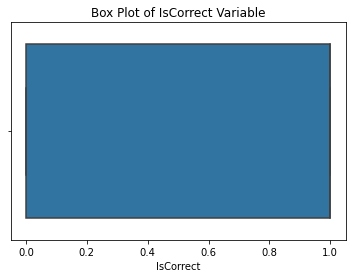

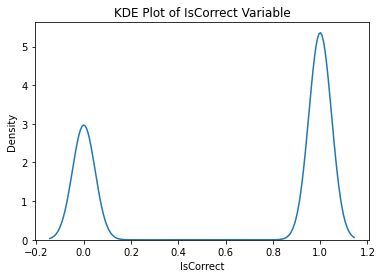

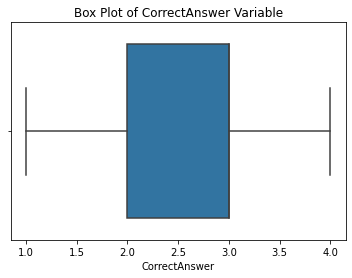

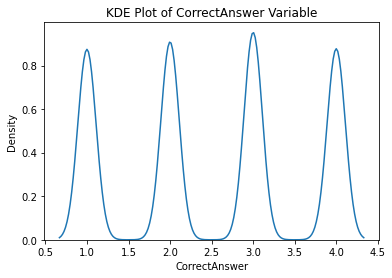

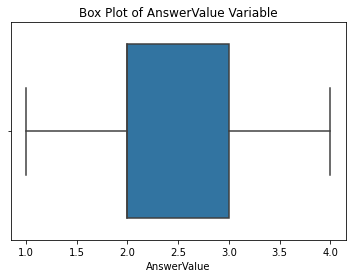

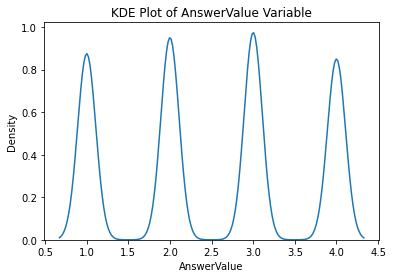

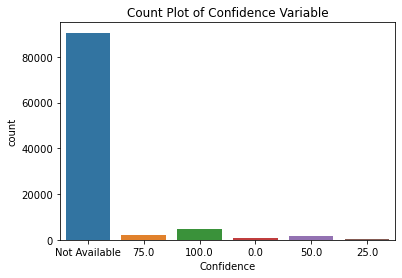

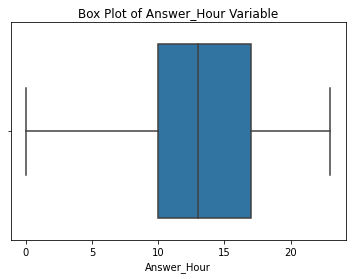

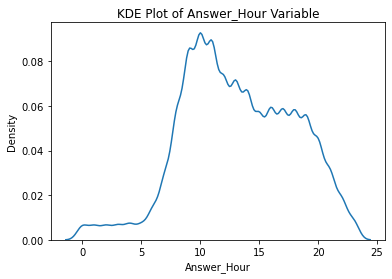

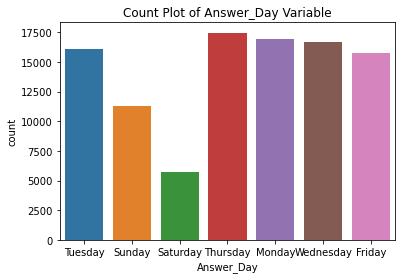

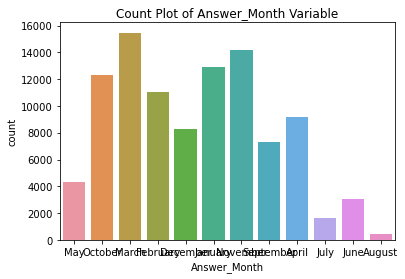

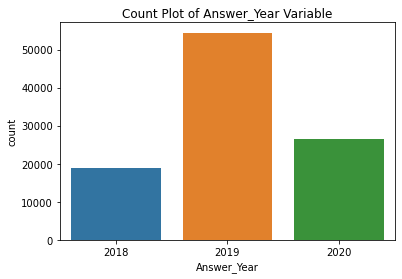

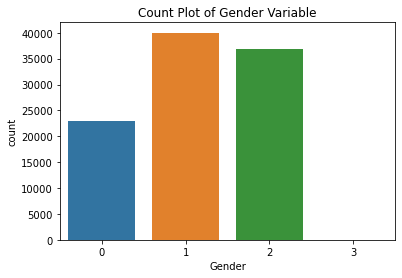

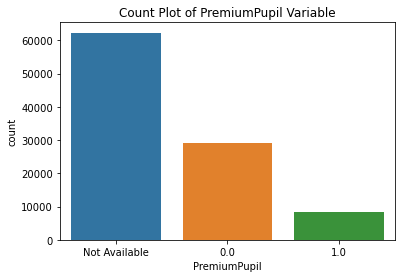

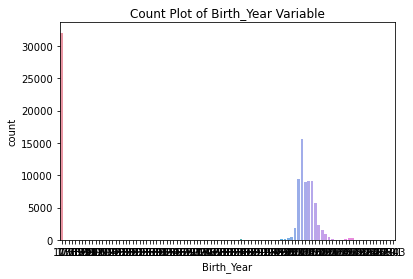

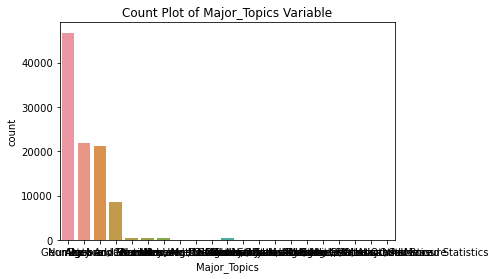

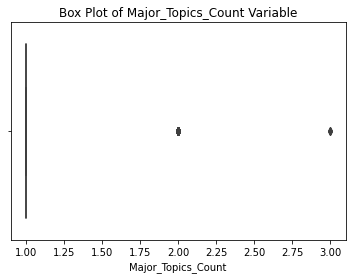

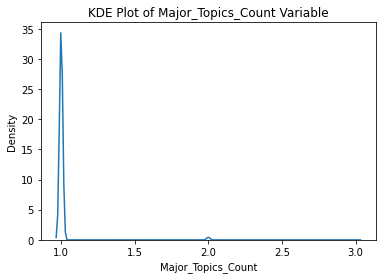

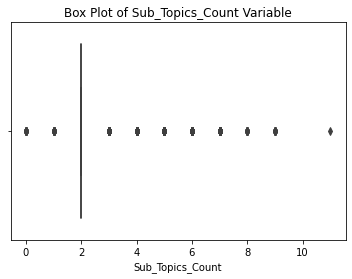

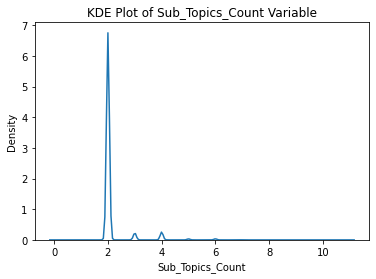

In [92]:
Exploration.VisualizeDistributions()

In [93]:
# Creating a function for getting percentage annotations on our countplots

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), size = 12)

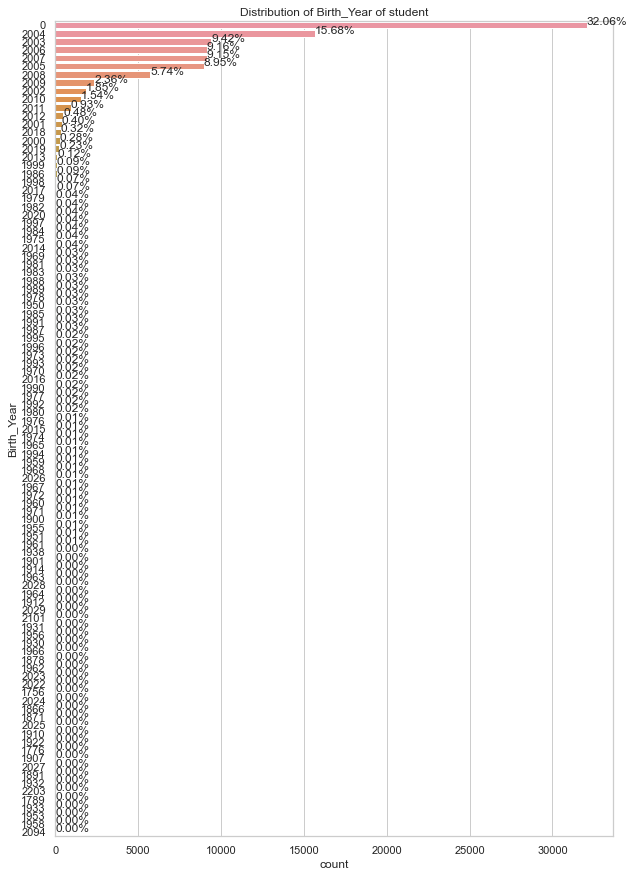

In [94]:
# Checking distribution of Birth Year of Students

sns.set(style='whitegrid')
plt.figure(figsize=(10,15))
ax = sns.countplot(y=df['Birth_Year'], order=df['Birth_Year'].value_counts().index )
plt.title('Distribution of Birth_Year of student')
without_hue(ax, df['Birth_Year'])

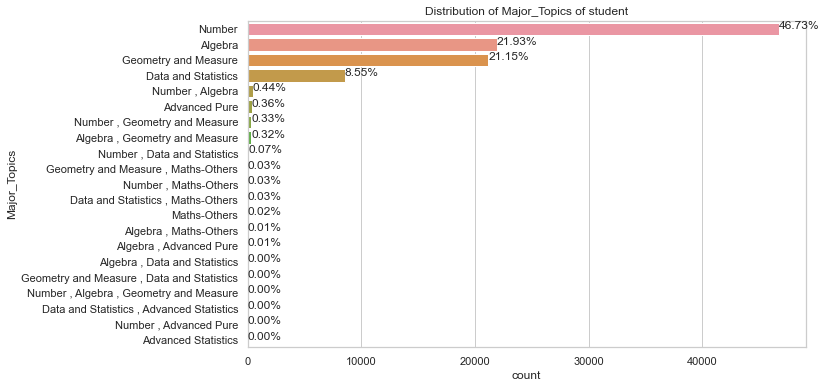

In [95]:
# Checking distribution of Major Topics of Questions and How They Answered It

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.countplot(y=df['Major_Topics'], order=df['Major_Topics'].value_counts().index)
plt.title('Distribution of Major_Topics of student')
without_hue(ax, df['Major_Topics'])

### 2.4) Dealing with Highly Cardinal Variables

In [96]:
# Checking cardinality of all the variables

Exploration.Cardinality()

Cardinality of Confidence variable >> 6
Cardinality of Answer_Day variable >> 7
Cardinality of Answer_Month variable >> 12
Cardinality of Answer_Year variable >> 3
Cardinality of Gender variable >> 4
Cardinality of PremiumPupil variable >> 3
Cardinality of Birth_Year variable >> 99
Cardinality of Major_Topics variable >> 21


## Observation

We have found some variables with high cardinality which have to reduced to make them useful. Our approach would be to capture the high occuring frequencies as is and the low occuring values in one category as 'All Others'.
The threshold could be different based on our understanding and contextual knowledge. 

In [97]:
# Performing the function on Birth Year variable and setting threshold of 90%
# We will keep on adding year values in our list and when it reaches 90% of whole data, left out years will be written as All Others

Birth_Year_Reduced_Cardinality, List_Birth_Year_Reduced = cumulatively_categorise(df['Birth_Year'],
                                                                return_categories_list=True, threshold=0.90)

In [98]:
Birth_Year_Reduced_Cardinality.value_counts()

0             32064
2004          15679
All Others     9846
2003           9419
2006           9157
2007           9148
2005           8951
2008           5736
Name: Birth_Year, dtype: int64

In [99]:
# Replacing the values with reduced cardinality

df['Birth_Year'] = Birth_Year_Reduced_Cardinality

In [100]:
# We have successfully brought downt the cardinality from 99 to 8 through categorizing low frequency values as 'All Others'

df['Birth_Year'].nunique()

8

In [101]:
#Creating a variable Answer_Hour_Period with time period categories: 'Morning', 'Noon', 'Evening' and 'Late Night'
# This categorization would reduce the cardinality of Answer_Hour 

df['Answer_Hour_Period'] = 'Not Added'
df['Answer_Hour_Period'].astype('object')

for i in df.index:
    # If Answer hour is between 6am to 12pm then the period is 'Morning'
    
    if df['Answer_Hour'][i] in range(6,12):
        df['Answer_Hour_Period'][i] = 'Morning'
        
    # If Answer hour is between 12pm to 6pm then the period is 'Afternoon'
    elif df['Answer_Hour'][i] in range(12,18):
        df['Answer_Hour_Period'][i] = 'Afternoon'
    
    # If Answer hour is between 6pm to 12am then the period is 'Evening'
    elif df['Answer_Hour'][i] in range(18,24):
        df['Answer_Hour_Period'][i] = 'Evening'
    
    # If Answer hour is between 12am to 6am then the period is 'Late Night'
    else:
        df['Answer_Hour_Period'][i] = 'Late Night'
        
        

In [102]:
# Checking categories of the new column Answer_Hour_Period

df['Answer_Hour_Period'].value_counts()

Afternoon     37697
Morning       36575
Evening       21619
Late Night     4109
Name: Answer_Hour_Period, dtype: int64

In [103]:
# Reducing Cardinality of Major_Topics variable and setting threshold of 99%
# We will keep on adding year values in our list and when it reaches 99% of whole data, left out years will be written as All Others

Major_Topics_Reduced_Cardinality, List_Major_Topics_Reduced = cumulatively_categorise(df['Major_Topics'],
                                                                return_categories_list=True, threshold=0.99)

In [104]:
# Checking the outcome of reduced cardinality

Major_Topics_Reduced_Cardinality.value_counts()

Number                  46727
Algebra                 21934
Geometry and Measure    21150
Data and Statistics      8546
All Others                838
Number , Algebra          442
Advanced Pure             363
Name: Major_Topics, dtype: int64

In [105]:
# Replacing our orginal variable 'Major_Topics' with reduced categories
# We are able to bring down the categories of Major_Topics from 21 to 7 

df['Major_Topics'] = Major_Topics_Reduced_Cardinality
df['Major_Topics'].nunique()

7

In [106]:
# Refreshing class variable again with modified dataframe and
# Checking cardinality of all the variables

Exploration = EDA(df)
Exploration.Cardinality()

Cardinality of Confidence variable >> 6
Cardinality of Answer_Day variable >> 7
Cardinality of Answer_Month variable >> 12
Cardinality of Answer_Year variable >> 3
Cardinality of Gender variable >> 4
Cardinality of PremiumPupil variable >> 3
Cardinality of Birth_Year variable >> 8
Cardinality of Major_Topics variable >> 7
Cardinality of Answer_Hour_Period variable >> 4


In [107]:
# Final prepared Dataframe before running ML Algos

df

,IsCorrect,CorrectAnswer,AnswerValue,Confidence,Answer_Hour,Answer_Day,Answer_Month,Answer_Year,Gender,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count,Answer_Hour_Period
0,1,4,4,Not Available,9,Tuesday,May,2019,0,Not Available,0,Number,1,2,Morning
1,0,1,2,Not Available,8,Sunday,October,2019,2,Not Available,2005,Number,1,2,Morning
2,0,3,1,Not Available,13,Tuesday,March,2019,0,Not Available,0,Number,1,2,Afternoon
3,1,3,3,Not Available,12,Saturday,February,2019,1,0.0,2007,Algebra,1,2,Afternoon
4,1,4,4,Not Available,11,Thursday,December,2018,0,Not Available,0,Number,1,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,3,2,75.0,15,Friday,September,2019,2,0.0,2004,Geometry and Measure,1,2,Afternoon
99996,0,2,4,Not Available,11,Monday,March,2020,1,0.0,2005,Geometry and Measure,1,2,Morning
99997,1,4,4,Not Available,22,Wednesday,September,2018,1,Not Available,2003,Number,1,2,Evening
99998,0,2,3,Not Available,19,Tuesday,April,2019,0,Not Available,0,Number,1,2,Evening


## End of Step 2: Data Preparation and  Exploration Stage

We were able to explore the data in this stage and make necessary data modifications through reducing cardinality, dropping of columns, replacing missing values, making changes to existing values. 

All this was done to make the data fit for running Machine Learning tasks.

# 3) Machine Learning 
## To Predict Whether Student Made a Correct Answer or Not

## 3.1) Data Pre-processing: Dropping Features, Splitting Data 

In [213]:
df

,IsCorrect,CorrectAnswer,AnswerValue,Confidence,Answer_Hour,Answer_Day,Answer_Month,Answer_Year,Gender,PremiumPupil,Birth_Year,Major_Topics,Major_Topics_Count,Sub_Topics_Count,Answer_Hour_Period
0,1,4,4,Not Available,9,Tuesday,May,2019,0,Not Available,0,Number,1,2,Morning
1,0,1,2,Not Available,8,Sunday,October,2019,2,Not Available,2005,Number,1,2,Morning
2,0,3,1,Not Available,13,Tuesday,March,2019,0,Not Available,0,Number,1,2,Afternoon
3,1,3,3,Not Available,12,Saturday,February,2019,1,0.0,2007,Algebra,1,2,Afternoon
4,1,4,4,Not Available,11,Thursday,December,2018,0,Not Available,0,Number,1,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,3,2,75.0,15,Friday,September,2019,2,0.0,2004,Geometry and Measure,1,2,Afternoon
99996,0,2,4,Not Available,11,Monday,March,2020,1,0.0,2005,Geometry and Measure,1,2,Morning
99997,1,4,4,Not Available,22,Wednesday,September,2018,1,Not Available,2003,Number,1,2,Evening
99998,0,2,3,Not Available,19,Tuesday,April,2019,0,Not Available,0,Number,1,2,Evening


In [239]:
# Segregating dataset into features and target and also creating one-hot encoding for categorical variables
# We are dropping certain columns which don't add value to the modelling

features = df.drop(columns=['IsCorrect','Answer_Hour','CorrectAnswer','AnswerValue'])
features = pd.get_dummies(features, drop_first=True)
target = df['IsCorrect']


# Splitting the dataset 80% training 20% test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Checking splits of test train data

print(f'Features_train shape >> {features_train.shape}')
print(f'target_train shape >> {target_train.shape}')
print(f'features_test shape >> {features_test.shape}')
print(f'target_test shape >> {target_test.shape}')


Features_train shape >> (80000, 47)
target_train shape >> (80000,)
features_test shape >> (20000, 47)
target_test shape >> (20000,)


## 3.2) Ranking Feature Importance Using Chi-Squared Test

In [240]:
# Using SelectKBest library of scikit learn feature selection package to find out feature importance
# We are using chi-squared methology for ranking our feature importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(features_train, target_train)
features_train_fs = fs.transform(features_train)
features_test_fs = fs.transform(features_test)

In [241]:
feature_importance = pd.Series(fs.scores_,index=features.columns).sort_values(ascending=False)
feature_importance

PremiumPupil_1.0                     475.289154
Confidence_100.0                     409.840817
PremiumPupil_Not Available           239.980507
Birth_Year_All Others                139.056766
Major_Topics_Number                  125.618785
Confidence_50.0                      101.604187
Confidence_25.0                       96.231135
Birth_Year_2004                       79.862511
Answer_Day_Saturday                   72.615830
Major_Topics_Algebra                  70.599767
Answer_Month_September                67.799136
Birth_Year_2008                       54.875132
Answer_Month_July                     47.076912
Answer_Hour_Period_Late Night         46.308330
Confidence_75.0                       31.230893
Major_Topics_Geometry and Measure     27.837416
Gender_2                              24.975960
Answer_Month_June                     22.811396
Answer_Month_January                  20.183910
Birth_Year_2003                       18.764689
Answer_Month_December                 14

## 3.3) Running Different ML Equations and Comparing Accuracy Scores

### 3.3.1) Logistic Regression Model

_____________________________________________
accuracy: 0.65285, 
 precision: 0.6597387487439843 , 
 recall: 0.9607979051139864 
 f1_score: 0.7823033267488163, 
 


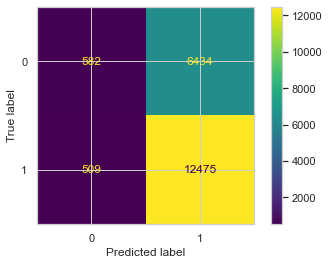

In [242]:
# Logistic REgression Model building and evaluation

from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=1000).fit(features_train, target_train)
MLMetrics(reg_model)

### 3.3.2) Decision Tree Classifier Model

_____________________________________________
accuracy: 0.5937, 
 precision: 0.661777747458899 , 
 recall: 0.753827026186961 
 f1_score: 0.7048096483580355, 
 


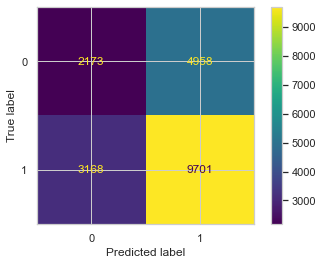

In [172]:
# Hyperparameters: Default

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_1 = DecisionTreeClassifier(random_state=0)
Dec_Tree_1.fit(features_train, target_train)
MLMetrics(Dec_Tree_1)

_____________________________________________
accuracy: 0.6462, 
 precision: 0.6541265364763476 , 
 recall: 0.9552412774885384 
 f1_score: 0.7765144337060199, 
 


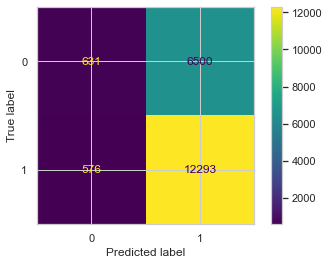

In [173]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_2 = DecisionTreeClassifier(random_state=0, max_depth=10)
Dec_Tree_2.fit(features_train, target_train)
MLMetrics(Dec_Tree_2)

_____________________________________________
accuracy: 0.65045, 
 precision: 0.6547493681550126 , 
 recall: 0.9662755458854612 
 f1_score: 0.7805781362794639, 
 


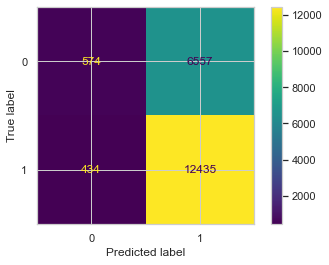

In [174]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10, Minimum Samples in leaf =100

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_3 = DecisionTreeClassifier(random_state=0, max_depth=10,  min_samples_leaf=100)
Dec_Tree_3.fit(features_train, target_train)
MLMetrics(Dec_Tree_3)

_____________________________________________
accuracy: 0.64645, 
 precision: 0.6544156812613189 , 
 recall: 0.9546973346802393 
 f1_score: 0.7765382549062984, 
 


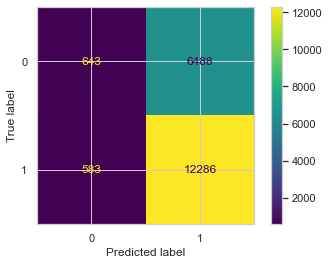

In [175]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10, Minimum Samples in leaf =5, min_samples_split=2

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_4 = DecisionTreeClassifier(random_state=0, min_samples_split=2, min_samples_leaf= 5, max_depth=10)
Dec_Tree_4.fit(features_train, target_train)
MLMetrics(Dec_Tree_4)

### 3.3.3) Support Vector Classifier

In [ ]:
# Kernel = 'Linear', C=1

from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, max_iter=2000)
SVC1 = model.fit(features_train, target_train)
MLMetrics(SVC1)


In [ ]:
# Kernel = 'Poly', C=1000

from sklearn.svm import SVC

model = SVC(kernel='poly', C=1000, max_iter=2000)
SVC2 = model.fit(features_train, target_train)
MLMetrics(SVC2)

In [ ]:
# Kernel = 'Poly', C=1000

from sklearn.svm import SVC

model = SVC(kernel='rbf', C=0.001, max_iter=2000)
SVC3 = model.fit(features_train, target_train)
MLMetrics(SVC3)

### 3.3.4) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(features_train, target_train)
MLMetrics(gnb)

## 3.3.5) Random Forest Classifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RFC1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RFC1.fit(features_train, target_train)
MLMetrics(RFC1)

In [ ]:
# Using a grid search by giving some parameters to find the best parameter for the mdoel 
# By deafault the criterion is 'gini'

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

RFC2=RandomForestClassifier(n_estimators=100, random_state=0)
RFC2_grid_cv = GridSearchCV(RFC2, param_grid, scoring="neg_log_loss", n_jobs=-1).fit(features_train, target_train)

print("Param for GS", RFC2_grid_cv.best_params_)
print("CV score for GS", RFC2_grid_cv.best_score_)
MLMetrics(RFC2_grid_cv)

### 3.3.6) Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


MLMetrics(GBC)

In [ ]:
# Use GridSearchCV for Hyperparameter Tuning in Gradient Boosting Classifier

# Defining parameters to try on the GBC Model

param_grid = {
    "max_depth": [3,5,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,5],
    "learning_rate": [0.1, 1, 0.001],
    "max_features": [5,10,15,None]
}

# Building the equation
GBC = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(features_train, target_train)
GBC_grid_cv = GridSearchCV(GBC, param_grid, n_jobs=-1).fit(features_train, target_train)

# PRinting best results and model evaluation of best model
print("Param for GS", GBC_grid_cv.best_params_)
print("CV score for GS", GBC_grid_cv.best_score_)
MLMetrics(GBC_grid_cv)

### 3.3.7) Bagging Classifier

In [ ]:
# Bagging Classifier using Decision Tree

from sklearn.ensemble import BaggingClassifier

Bag_Dec_Tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0).fit(features_train, target_train)
MLMetrics(Bag_Dec_Tree)

In [ ]:
# Bagging Classifier using Naive Bayes Classifier

Bag_Ran_Forest = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=0).fit(features_train, target_train)
MLMetrics(Bag_Ran_Forest)

### 3.3.8) ADA Booster Classifier

In [ ]:
param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]
}

from sklearn.ensemble import AdaBoostClassifier

ADA_Boost = AdaBoostClassifier(random_state = 0).fit(features_train, target_train)
ADA_Boost_grid_cv = GridSearchCV(ADA_Boost, param_grid, n_jobs=-1).fit(features_train, target_train)

# PRinting best results and model evaluation of best model
print("Param for GS", ADA_Boost_grid_cv.best_params_)
print("CV score for GS", ADA_Boost_grid_cv.best_score_)
MLMetrics(ADA_Boost_grid_cv)

## Code to be Ignored

In [ ]:
# Creating a for loop to give us unqiue identifier for every subject combination list under column Subject ID

# Initializing with a list which will be appended with each subjectid value to see if it matches with the next row value
#mylist = [[0,0]]
#count=0
#df_question_metadata['SubjectCode'] = np.nan


#for i in df_question_metadata.index:
    # Appending the list with subject id value of current index 
    #mylist.append(df_question_metadata['SubjectID'][i])
    
    # If the Id doesn't match previous existing list item, count with increment and new value will be given to the subject id
    #if df_question_metadata['SubjectID'][i] != mylist[0]:
        #count+=1
        # Creating a new column which will contain count value as unique code
        #df_question_metadata['SubjectCode'][i] = count       
        
    #else:
        #df_question_metadata['SubjectCode'][i] = count
        #print(f'same found at i={i}, current count = {count}, {mylist}')
    
    # Removing the first value in the list after each loop
    # Since in next loop we want another value to check the match, we have to remove the first value in the list everytime
    #mylist.pop(0)
    
#df_question_metadata['SubjectCode'] = df_question_metadata['SubjectCode'].astype('int')

In [ ]:
def get_model(config):
    return config['model'](**config['kwargs'])

def run_models(model_configs, session_best_scores, dataset_details):
    for config in model_configs:
        print(f'Model : {config["model"]._name_}')
        print(f'Parameters : {config["kwargs"]}')
        model = get_model(config)
        start_time = perf_counter()
        model.fit(X_train, y_train)
        end_time = perf_counter()
        score_train = model.score(X_train, y_train)
        score_test_pub = model.score(X_test_pub, y_test_pub)
        score_test_pri = model.score(X_test_pri, y_test_pri)
        elapsed_time = end_time - start_time
        record_best_scores(session_best_scores, model, config, score_train, score_test_pub, score_test_pri, elapsed_time, dataset_details)
        write_best_scores(session_best_scores,'session')
        report_score(config, score_train, score_test_pub, score_test_pri, elapsed_time)
        print(f'{"="*50}')

SVM_rbf_1_config = {
    'model': SVC,
    'kwargs': {
        'kernel': 'rbf',
        'C': 1,
        'max_iter': 1000,
        'random_state': 0
    }
}